In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
from scipy.sparse import csr_matrix
from anndata import read_h5ad
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

In [6]:
def scatter_gen(df1, df2,figname, xname,yname, path):
    os.makedirs(path, exist_ok=True)
    df1_avg = np.mean(df1, axis=0)[:300].values
    df2_avg = np.mean(df2, axis=0)[:300].values

    df1_blank = np.mean(df1.iloc[:,300:].values)
    df2_blank = np.mean(df2.iloc[:,300:].values)
    corr = np.round(scipy.stats.pearsonr(df1_avg, df2_avg).statistic, 2)
    fig = plt.figure(figsize=(6,6))
    max_val = np.max([np.ceil(np.max(df1_avg)), np.ceil(np.max(df2_avg))])
    bd = 11
    plt.scatter(df1_avg, df2_avg, c='black', s=3)
    plt.plot([0, bd], [0, bd], color='darkblue', linestyle='-')
    plt.xscale('log')
    plt.xticks([0.01, 0.1, 1, 10], [r'$10^{-2}$', r'$10^{-1}$', r'$10^0$', r'$10^1$'])
    plt.yscale('log')
    plt.yticks([0.01, 0.1, 1, 10], [r'$10^{-2}$', r'$10^{-1}$', r'$10^0$', r'$10^1$'])
    plt.xlim((0.004,bd))
    plt.ylim((0.004,bd))
    plt.axvline(x=df1_blank, color='grey', linestyle='--')
    plt.axhline(y=df2_blank, color='grey', linestyle='--')
    plt.xlabel(xname)
    plt.ylabel(yname)
    fig.savefig(f"{path}/{figname}, corr={corr}.png", dpi = 400)
    plt.close()
    return corr

In [ ]:
df1_lst = ["202303211414_FB080-C_VMSC02901", "202304281759_FB080-F-dorsal4_VMSC02901",
           "202302251640_FB080-BA17_VMSC02901", "202302251640_FB080-BA17_VMSC02901",
           "202302271239_FB080-BA17-2_VMSC02901", "202304101544_UMB1117-FP_VMSC02901",
           "202304181458_UMB1117-B-1_VMSC02901"]

df2_lst = ["202303221850_FB080-C-2_VMSC02901", "202304271501_FB080-F-dorsal-3_VMSC02901",
           "202302271239_FB080-BA17-2_VMSC02901", "202303231348_FB080-BA17-3_VMSC02901", 
           "202303231348_FB080-BA17-3_VMSC02901", "202304111450_UMB1117-FP-2_VMSC02901",
           "202304211731_UMB1117-B-2_VMSC02901"]

name1_lst = ["FB080-F2a", "FB080-P1a", "FB080-O1a", "FB080-O1a", "FB080-O1b", "UMB1117-F1a", "UMB1117-F2a"]

name2_lst = ["FB080-F2b", "FB080-P1b", "FB080-O1b", "FB080-O1c", "FB080-O1c", "UMB1117-F1b", "UMB1117-F2b"]
corr_lst = []
path = "same"

for i in range(len(df1_lst)):
    df1 = pd.read_csv(f"../segment_data/{df1_lst[i]}/cell_by_gene.csv", index_col=0)
    df2 = pd.read_csv(f"../segment_data/{df2_lst[i]}/cell_by_gene.csv", index_col=0)
    corr_i = scatter_gen(df1, df2, f"{name1_lst[i]}_{name2_lst[i]}", name1_lst[i], name2_lst[i], path=path)
    corr_lst.append(corr_i)
np.save(f"{path}/corr.npy", corr_lst)

In [25]:
df1_lst = ["202303101614_FB080-BD-230310_VMSC02901", "202303211414_FB080-C_VMSC02901",
           "202304281759_FB080-F-dorsal4_VMSC02901", "202303192017_FB080-F-lateral_VMSC02901",
           "202306161342_FB080F-ventral_VMSC02901", "202302251640_FB080-BA17_VMSC02901"]

df2_lst = ["202212211422_FB121-GW20-3A_VMSC02901", "202212281554_FB121-GW20-4A_VMSC02901",
           "202212051316_FB121-5A-GW20_VMSC02901", "202302211407_FB121-6A-230221_VMSC02901",
           "202301031539_FB121-5C-rerun_VMSC02901_V1", "202212021433_FB121-BA17-GW20_VMSC02901_dilation10"]

name1_lst = ["FB080-F1", "FB080-F2a", "FB080-P1a", "FB080-P2", "FB080-T1", "FB080-O1a"]

name2_lst = ["FB121-F1", "FB121-F2", "FB121-P1", "FB121-P2", "FB121-T1", "FB121-O1"]
corr_lst = []
path = "between"

for i in range(len(df1_lst)):
    df1 = pd.read_csv(f"../segment_data/{df1_lst[i]}/cell_by_gene.csv", index_col=0)
    df2 = pd.read_csv(f"../segment_data/{df2_lst[i]}/cell_by_gene.csv", index_col=0)
    corr_i = scatter_gen(df1, df2, f"{name1_lst[i]}_{name2_lst[i]}", name1_lst[i], name2_lst[i], path=path)
    corr_lst.append(corr_i)
np.save(f"{path}/corr.npy", corr_lst)

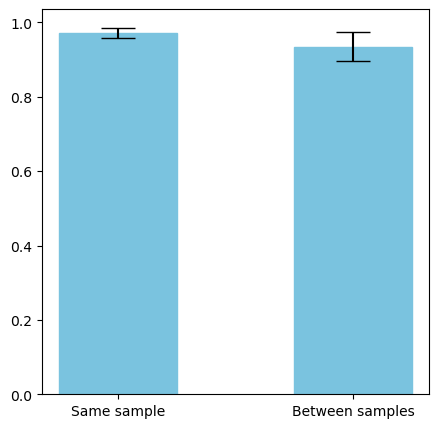

In [27]:
corr_same = np.load("same/corr.npy", allow_pickle=True)
corr_between = np.load("between/corr.npy", allow_pickle=True)

w = 0.5    # bar width
x = [1, 2] # x-coordinates of your bars
# colors = [(0, 0, 1, 1), (1, 0, 0, 1)]    # corresponding colors
colors = "#7AC3DF"
y = [corr_same,       # data series
    corr_between]

fig, ax = plt.subplots(figsize = (5,5))
ax.bar(x,
       height=[np.mean(yi) for yi in y],
       yerr=[np.std(yi) for yi in y],    # error bars
       capsize=12, # error bar cap width in points
       width=w,    # bar width
       tick_label=["Same sample", "Between samples"],
       color=colors,  # face color transparent
       edgecolor=colors,
       #ecolor=colors,    # error bar colors; setting this raises an error for whatever reason.
       )
fig.savefig("corr_bar.pdf", dpi = 400)
plt.show()